In [5]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/258.0 kB 1.4 MB/s eta 0:00:01
   ------------------- -------------------- 122.9/258.0 kB 1.4 MB/s eta 0:00:01
   -------------------------------------- - 245.8/258.0 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 1.6 MB/s eta 0:00:00


In [73]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv("data.csv",sep=';')
data.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
data.index

RangeIndex(start=0, stop=4424, step=1)

In [10]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [13]:
data.rename(columns={"Nacionality":"Nationality"},inplace=True)

In [15]:
df = data.copy()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [17]:
df.shape

(4424, 37)

In [18]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nationality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [19]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [20]:
df[df.duplicated()]

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target


In [23]:
df.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [28]:
df = df[(df.Target == "Graduate") | (df.Target=="Dropout")]

In [35]:
cat = [f for f in df.columns if df[f].nunique()<10]
for f in cat:
    print(f"{f}: {df[f].unique()}")
    print("_"*50)

Marital status: [1 2 4 3 5 6]
__________________________________________________
Application order: [5 1 2 4 3 6 0]
__________________________________________________
Daytime/evening attendance	: [1 0]
__________________________________________________
Displaced: [1 0]
__________________________________________________
Educational special needs: [0 1]
__________________________________________________
Debtor: [0 1]
__________________________________________________
Tuition fees up to date: [1 0]
__________________________________________________
Gender: [1 0]
__________________________________________________
Scholarship holder: [0 1]
__________________________________________________
International: [0 1]
__________________________________________________
Inflation rate: [ 1.4 -0.3 -0.8  0.3  2.8  3.7  0.6  0.5  2.6]
__________________________________________________
Target: ['Dropout' 'Graduate']
__________________________________________________


In [41]:
num = df.columns[~df.columns.isin(cat)]
for f in num:
    print(f"{f}: Min:{df[f].min()}\tMax:{df[f].max()}")
    print("_"*50)

Application mode: Min:1	Max:57
__________________________________________________
Course: Min:33	Max:9991
__________________________________________________
Previous qualification: Min:1	Max:43
__________________________________________________
Previous qualification (grade): Min:95.0	Max:190.0
__________________________________________________
Nationality: Min:1	Max:109
__________________________________________________
Mother's qualification: Min:1	Max:44
__________________________________________________
Father's qualification: Min:1	Max:44
__________________________________________________
Mother's occupation: Min:0	Max:194
__________________________________________________
Father's occupation: Min:0	Max:195
__________________________________________________
Admission grade: Min:95.0	Max:190.0
__________________________________________________
Age at enrollment: Min:17	Max:70
__________________________________________________
Curricular units 1st sem (credited): Min:0	Max:20
______

In [42]:
df.Course.nunique()

17

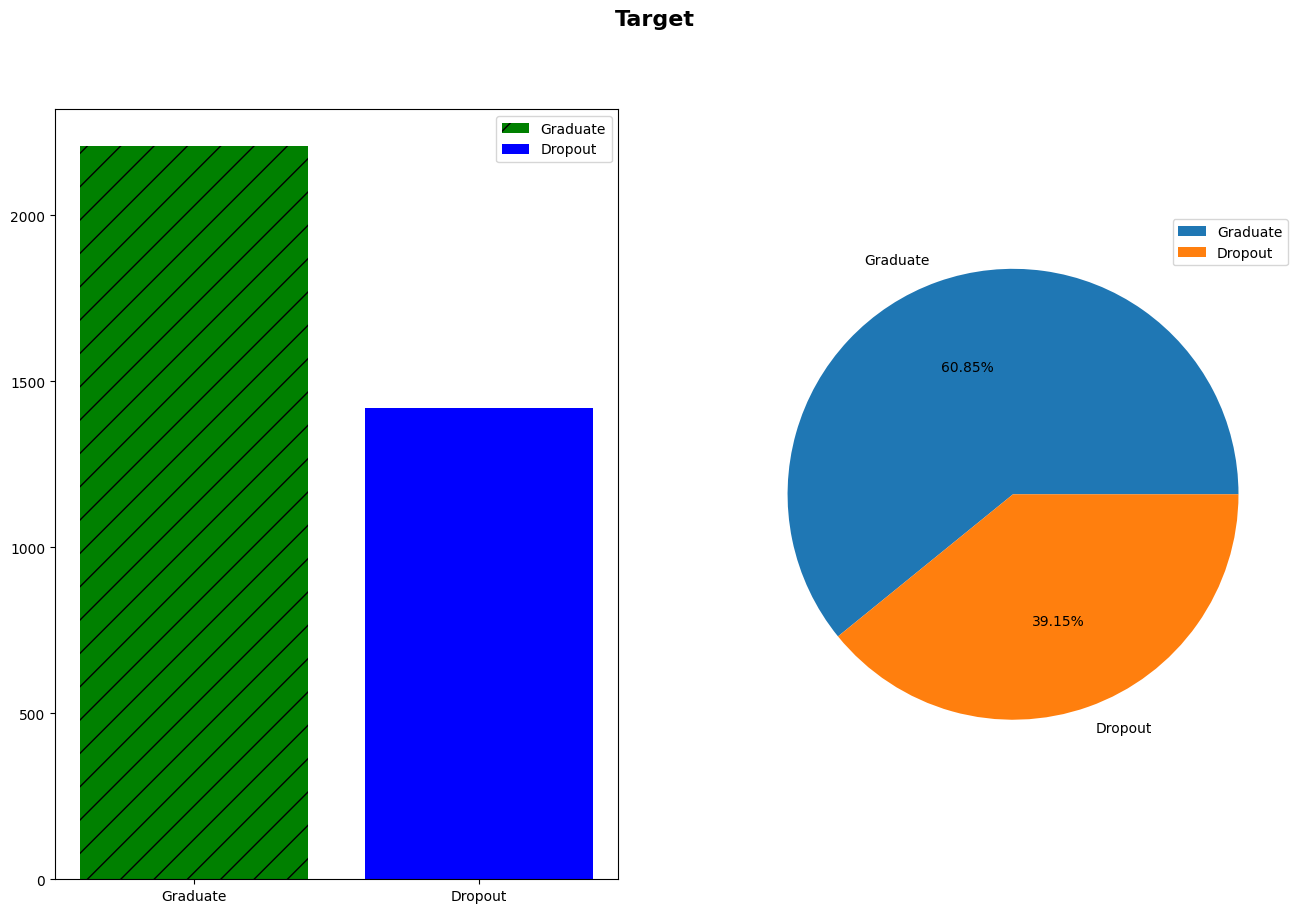

In [53]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.suptitle("Target",fontsize=16,weight='bold')
plt.bar(df["Target"].value_counts().index,height=df["Target"].value_counts(),label=df.Target.value_counts().index,color=["green","blue"])[0].set_hatch('/')
plt.legend()
plt.subplot(1,2,2)
plt.pie(df["Target"].value_counts(),labels=df.Target.value_counts().index,autopct="%.2f%%")
plt.legend()
plt.show()

In [56]:
df.Target = df.Target.map({"Graduate":0,"Dropout":1})

In [58]:
cl0 = df[df.Target == 0]
cl1 = df[df.Target == 1]

In [59]:
cl0.shape

(2209, 37)

In [60]:
cl1.shape

(1421, 37)

In [63]:
cl0.shape[0]/cl1.shape[0]

1.5545390570021111

# Handling Imbalanced Data

In [66]:
test = df.sample(int(df.shape[0] * 0.2))
train = df.drop(test.index)

In [67]:
test.shape

(726, 37)

In [68]:
train.shape

(2904, 37)

In [69]:
cl0 = train[train.Target == 0]
cl1 = train[train.Target == 1]
print(cl0.shape)
print(cl1.shape)

(1773, 37)
(1131, 37)


# undersampling

In [76]:
dt = pd.concat([cl0.sample(cl1.shape[0]),cl1],axis=0)

In [77]:
dt

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1865,1,39,1,9991,0,1,130.0,1,1,1,...,0,5,5,5,12.400000,0,15.5,2.8,-4.06,0
463,1,39,1,9147,1,19,133.1,1,3,1,...,0,5,6,5,12.200000,0,12.4,0.5,1.79,0
2055,1,1,1,9070,1,1,130.0,41,37,19,...,0,6,6,6,13.500000,0,11.1,0.6,2.02,0
3753,1,43,4,9500,1,6,134.0,1,37,37,...,0,7,7,6,14.850000,0,7.6,2.6,0.32,0
2908,1,43,1,9085,1,1,130.0,1,37,37,...,2,7,10,7,13.571429,0,7.6,2.6,0.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,2,39,1,9130,1,19,133.1,1,2,1,...,0,6,9,2,10.500000,0,16.2,0.3,-0.92,1
4408,2,39,1,9773,1,1,100.0,1,37,37,...,0,6,10,6,11.666667,0,12.7,3.7,-1.70,1
4411,1,44,1,9130,1,39,150.0,1,37,37,...,0,6,11,3,13.333333,0,13.9,-0.3,0.79,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1


In [78]:
x_train,x_test,y_train,y_test = train_test_split(dt.drop("Target",axis=1),dt.Target,test_size=0.2,stratify = dt.Target)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,BatchNormalization
from sklearn.metrics import confusion_matrix,classification_report

In [101]:
def ANN(x_train,y_train,x_test,y_test):
    model = Sequential([
    Dense(units=36,activation='relu',input_dim=36),
    BatchNormalization(axis=1),
    Dense(units= 20,activation = 'relu'),
    Dropout(0.2),
    Dense(units= 1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    model.fit(x_train,y_train,epochs=100,batch_size=32)
    pred = model.predict(x_test)
    pred = np.round(pred)
    print("Classification Report: \n", classification_report(y_test, pred))
    return model,pred

In [102]:
mod,pred = ANN(x_train,y_train,x_test,y_test)

Epoch 1/100
57/57 [==============================] - 1s 2ms/step - loss: 0.7489 - accuracy: 0.5080
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6960 - accuracy: 0.5544
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.6473
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.7125
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.7518
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7872
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.8176
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8176
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8347
Epoch 10/100
57/57 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8458
Epoch 11/

In [105]:
test_pred = mod.predict(test.drop("Target",axis=1))
test_pred = np.round(test_pred)

23/23 [==============================] - 0s 1ms/step


In [106]:
print(classification_report(test.Target,test_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       436
           1       0.72      0.93      0.81       290

    accuracy                           0.83       726
   macro avg       0.83      0.85      0.83       726
weighted avg       0.85      0.83      0.83       726



# oversampling

In [108]:
cl0.shape

(1773, 37)

In [109]:
cl1.shape

(1131, 37)

In [111]:
train = pd.concat([cl0,cl1.sample(cl0.shape[0],replace=True)])

In [112]:
x_train,x_test,y_train,y_test = train_test_split(train.drop("Target",axis=1),train.Target,test_size=0.2,stratify = train.Target)

In [113]:
mod2,pred = ANN(x_train,y_train,x_test,y_test)

Epoch 1/100
89/89 [==============================] - 1s 2ms/step - loss: 0.6998 - accuracy: 0.5328
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.6393
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5219 - accuracy: 0.7645
Epoch 4/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4240 - accuracy: 0.8156
Epoch 5/100
89/89 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8230
Epoch 6/100
89/89 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8360
Epoch 7/100
89/89 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8441
Epoch 8/100
89/89 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8575
Epoch 9/100
89/89 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8516
Epoch 10/100
89/89 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8607
Epoch 11/

In [114]:
test_pred = mod2.predict(test.drop("Target",axis=1))
test_pred = np.round(test_pred)
print(classification_report(test.Target,test_pred))

23/23 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.64      0.03      0.06       436
           1       0.40      0.97      0.57       290

    accuracy                           0.41       726
   macro avg       0.52      0.50      0.31       726
weighted avg       0.54      0.41      0.26       726



In [115]:
df.shape

(3630, 37)

In [125]:
smote = SMOTE(sampling_strategy='minority')
sm_x,sm_y = smote.fit_resample(df.drop("Target",axis=1),df.Target)

In [126]:
sm_x.shape

(4418, 36)

In [127]:
sm_y.shape

(4418,)

In [128]:
x_train,x_test,y_train,y_test = train_test_split(sm_x,sm_y,test_size=0.2,stratify=sm_y)

In [129]:
mod,pred = ANN(x_train,y_train,x_test,y_test)

Epoch 1/100
111/111 [==============================] - 1s 2ms/step - loss: 0.6995 - accuracy: 0.5441
Epoch 2/100
111/111 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6503
Epoch 3/100
111/111 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7728
Epoch 4/100
111/111 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8144
Epoch 5/100
111/111 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8376
Epoch 6/100
111/111 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8531
Epoch 7/100
111/111 [==============================] - 0s 2ms/step - loss: 0.3212 - accuracy: 0.8642
Epoch 8/100
111/111 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8735
Epoch 9/100
111/111 [==============================] - 0s 2ms/step - loss: 0.2960 - accuracy: 0.8806
Epoch 10/100
111/111 [==============================] - 0s 2ms/step - loss: 0.2948 - accura

In [130]:
mod.save("Student.h5")